# Datos

In [1]:
# General Purpose
import pandas as pd
import pickle
import numpy as np

# FE
from CustomTransform import RangeEncoder

from sklearn.metrics import mean_squared_error, mean_absolute_error, mean_absolute_percentage_error

In [2]:
# Cargamos los datos
dataTest = pd.read_csv('depDataTest_Arnau_20-08.csv')

# Modelado

In [3]:
# Train-Test target

target = 'ide_price'

y_test = dataTest.pop(target)
X_test = dataTest

## Model Import

In [4]:
filename = 'models/GOATModel_RandomForestRegressor'
loaded_model = pickle.load(open(filename, 'rb'))[0]

In [5]:
dataTest_y_PRED = loaded_model.predict(X_test)

mape = mean_absolute_percentage_error(y_test, dataTest_y_PRED)

msg = "%s: %f" % ('MAPE', mape)
print(msg)

MAPE: 0.164795


## Test Results EDA

In [6]:
test_full = pd.DataFrame(y_test)
test_full['ide_price prediction'] = dataTest_y_PRED

In [7]:
test_results = pd.merge(X_test, test_full, left_index=True, right_index=True)

## EXPORT DATA TO EXCEL

In [8]:
encoder1 = RangeEncoder('ide_price_bins', 'ide_price', 32)
encoder1.fit(test_results)
test_results = encoder1.transform(test_results)

encoder2 = RangeEncoder('ide_size_bins', 'ide_size', 32)
encoder2.fit(test_results)
test_results = encoder2.transform(test_results)

In [9]:
df = test_results.copy()
filter_by_list = ['geo_distrito', 'geo_barrio', 'ide_price_bins', 'ide_size_bins']
first = True

for filter_by in filter_by_list:
    
    metrics = pd.DataFrame(columns = [filter_by, "MSE", "MAE", "MAPE", "R2"])
    
    for item in df[filter_by].tolist():
        
        values = df.loc[(df[filter_by] == item)]

        metrics_ = pd.DataFrame({filter_by: item,
                            "MSE": np.round(mean_squared_error(values["ide_price"], values["ide_price prediction"]), 4),
                            "MAE": np.round(mean_absolute_error(values["ide_price"], values["ide_price prediction"]), 4),
                            "MAPE": np.round(mean_absolute_percentage_error(values["ide_price"], values["ide_price prediction"]), 4)}, index=[0])
        metrics = metrics.append(metrics_)
    
    metrics = metrics.groupby(filter_by).mean()

    if first:
        with pd.ExcelWriter("predictions_output/predictions_metrics.xlsx", engine='openpyxl', mode="w") as writer: # first one in write mode to delete previous data (new excel)
            metrics.to_excel(writer, sheet_name = 'Métricas '+filter_by, index=True)
        first = False
    else:
        with pd.ExcelWriter("predictions_output/predictions_metrics.xlsx", engine='openpyxl', mode="a") as writer: # first one in write mode to delete previous data (new excel)
            metrics.to_excel(writer, sheet_name = 'Métricas '+filter_by, index=True)

NameError: name 'mean_absolute_error' is not defined

## DENSITY PLOTS WITH JOYPY

In [8]:
import joypy
import matplotlib.pyplot as plt
from matplotlib import cm

In [16]:
df

,ide_floor,ide_size,ide_longitude,ide_latitude,his_quarterly_variation,his_price,his_monthly_variation,his_annual_variation,geo_distrito,geo_barrio,...,dem_PropSinEstudios,dem_Proporcion_de_nacidos_fuera_de_Espana,dem_PropConEstudiosUniversitarios,dem_PobTotal,dem_NumViviendas,dem_EdadMedia,dem_Densidad_(Habit/Ha),fe_micole_weights,ide_price,ide_price prediction
0,2.0,175.0,-3.715417,40.422832,0.5,4773,0.3,-3.7,Moncloa - Aravaca,Argüelles,...,0.066403,20.963846,0.589914,24423,10490.0,46.972342,322.402577,0.084622,1400000.0,9.202052e+05
1,4.0,71.0,-3.706351,40.424913,1.4,5106,0.1,-4.3,Centro,Universidad,...,0.083812,32.102460,0.529590,33418,16913.0,43.678945,352.500616,0.095684,365000.0,3.867208e+05
2,NaN,625.0,-3.767169,40.466552,0.2,4182,-0.1,-3.6,Moncloa - Aravaca,Valdemarín,...,0.053543,15.365819,0.699977,6957,1984.0,36.697930,21.066101,0.189791,2099000.0,2.339698e+06
3,0.0,117.0,-3.704230,40.424084,1.4,5106,0.1,-4.3,Centro,Universidad,...,0.083812,32.102460,0.529590,33418,16913.0,43.678945,352.500616,0.092895,429000.0,4.489949e+05
4,0.0,90.0,-3.763866,40.396186,1.9,2174,2.4,-3.2,Latina,Aluche,...,0.219880,26.475125,0.225788,67418,26836.0,48.380655,236.570161,0.096254,179000.0,2.066962e+05
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4460,0.0,28.0,-3.705236,40.448713,-0.3,3489,0.4,-0.7,Tetuán,Bellas Vistas,...,0.139521,36.845626,0.353018,29895,12039.0,43.224268,418.012531,0.103118,94000.0,1.193052e+05
4461,1.0,247.0,-3.797123,40.458962,3.1,3683,1.2,0.8,Moncloa - Aravaca,Aravaca,...,0.071317,15.663746,0.609832,27503,8706.0,40.112479,47.142277,0.130232,1250000.0,1.162383e+06
4462,3.0,73.0,-3.731940,40.377805,-0.9,1859,0.0,-4.1,Carabanchel,Abrantes,...,0.221107,34.012583,0.178648,31947,11175.0,42.374887,204.190236,0.071299,137260.0,1.346012e+05
4463,5.0,72.0,-3.704166,40.455556,1.8,3345,0.0,2.8,Tetuán,Berruguete,...,0.153495,37.770383,0.309838,25843,10437.0,42.505340,425.705154,0.090187,304880.0,2.748299e+05


In [75]:
df = test_results.copy()
df['MAPE'] = df.apply(lambda x: np.round(mean_absolute_percentage_error(x[["ide_price"]], x[["ide_price prediction"]]), 4), axis = 1)
df = df[['ide_price','geo_distrito','MAPE']]

In [82]:
df_fig = df[df["MAPE"] <= 1].copy()

In [83]:
mean_values = df_fig.groupby('geo_distrito')['MAPE'].mean().rename('MAPE promedio', inplace = True)

In [84]:
df_fig_mean = pd.merge(df_fig, mean_values, how='left', left_on='geo_distrito', right_on='geo_distrito')
df_fig_mean['MAPE promedio'] = df_fig_mean['MAPE promedio'].apply(lambda x: np.round(x,5))

In [89]:
df_fig_mean.drop(['ide_price'], axis = 1, inplace = True)

In [91]:
df_fig_mean.to_csv('mape_por_distrito.csv', index = False)

In [85]:
dict_df = {}
categ=list(df_fig_mean['MAPE promedio'].unique())
inf=[]
for element in categ:
    inf.append(element)
inf.sort(reverse=True)

categ=list(df_fig_mean['geo_distrito'].unique())
for element in inf:
    for cat in categ:
        if (element == float(df_fig_mean[(df_fig_mean['geo_distrito'] == cat)]['MAPE promedio'][:1])):
            dict_df[cat] = list(df_fig[df_fig["geo_distrito"] == cat]["MAPE"])

<Figure size 1040x880 with 0 Axes>

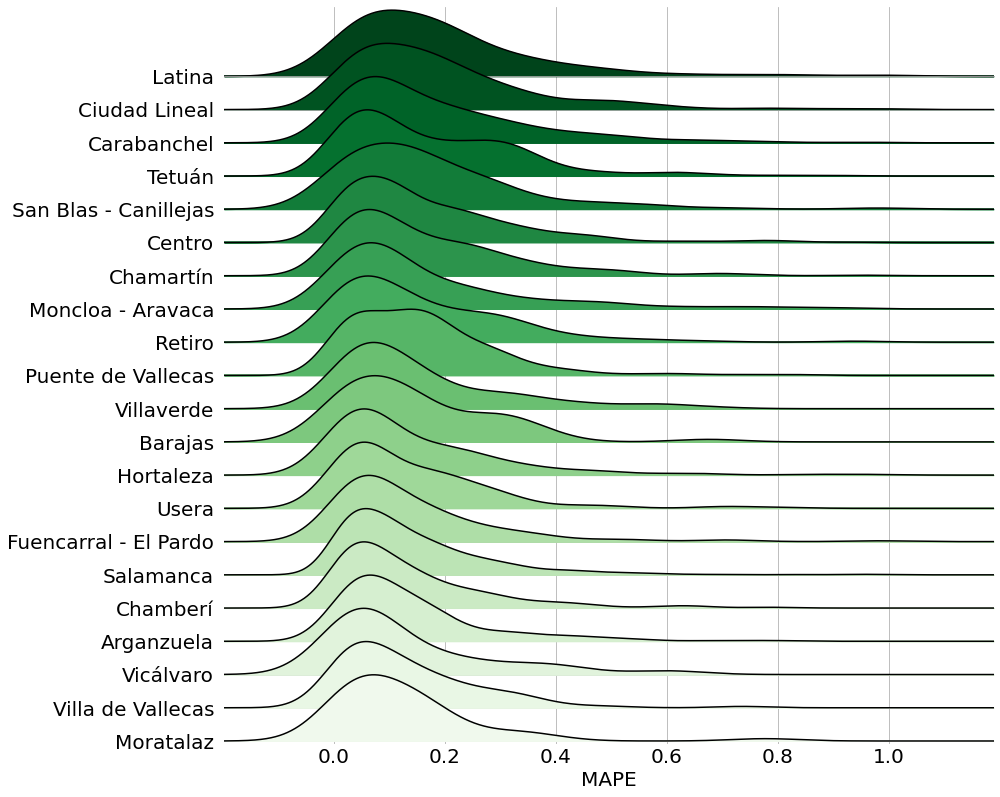

In [86]:
# Draw Plot

plt.figure(figsize=(13,11), dpi= 80)

fig, axes = joypy.joyplot(dict_df, ylim="own",figsize=(14,11),ylabels=True,xlabels=True,overlap=1,ylabelsize=20,xlabelsize=20,grid=True, colormap=cm.Greens_r)

# Decoration
ax = axes[-1]
ax.xaxis.set_label_position("bottom")
ax.set_xlabel("MAPE",fontsize=20)
ax.xaxis.set_visible(True)

plt.show()